In [1]:
import os

from weighted_sum_precision.GNN_functions_patients_only import *
from weighted_sum_precision.GNN_SAGE import SAGE_MLC
from weighted_sum_precision.GNN_GCN import GCN_MLC

num_Sample     = int(os.getenv('num_Sample', 500))  # Default to 10000 if not set
num_Labels     = int(os.getenv('NUM_DISEASES', 203))  # Default to 100 if not set
num_top_Labels = int(os.getenv('NUM_TOP_DISEASES', 203))  # Selecting the top most frequent labels
disease_name   = os.getenv('DISEASE_FILE', f'DMPLB2')  # Default to 'sample/10000' if not set
num_epochs     = int(os.getenv('num_epochs', 15))    
# ============================================================================

saving_path = f'../Data/{num_Labels}_Diagnoses/{disease_name}/{num_Sample}'

GNN_model = SAGE_MLC
super_class = '' #'superclasses'

exp_name = f'{num_epochs}_epochs_{super_class}'

losses, val_metrics, meta_path_weights = main(saving_path, 
                           GNN_Model=GNN_model, 
                           num_epochs = num_epochs,
                           exp_name = exp_name,
                           super_class = super_class, 
                           top_k = 5,
                           num_D = num_top_Labels)

	- Loading the data...
../Data/203_Diagnoses/DMPLB2/500


/home/almusawiaf/MyDocuments/PhD_Projects/HGNN_Project2/GNN_Models/weighted_sum_precision/GNN_functions_patients_only.py:245: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  t

	- Generating the Data structure ...
	- Generating the train, test, and validation sets...
	- Number of meta-paths used is :26
	- Preparing the model...
	- Epochs...
{
    "accuracy": 0.0,
    "micro_precision": 0.06345177664974619,
    "macro_precision": 0.005867507135116682,
    "recall": 0.022420108627005178,
    "f1_score": 0.007823953554259133,
    "auc": 0.0,
    "top_k_1": 0.046666666865348816,
    "top_k_pred": 0.05666666850447655
}
	- Extracting and saving embeddings...
              precision    recall  f1-score   support

     Class 0       0.29      0.38      0.33        13
     Class 1       0.00      0.00      0.00         9
     Class 2       0.00      0.00      0.00        11
     Class 3       0.00      0.00      0.00         7
     Class 4       0.00      0.00      0.00         7
     Class 5       0.00      0.00      0.00         6
     Class 6       0.17      0.17      0.17         6
     Class 7       0.00      0.00      0.00         6
     Class 8       0.00      

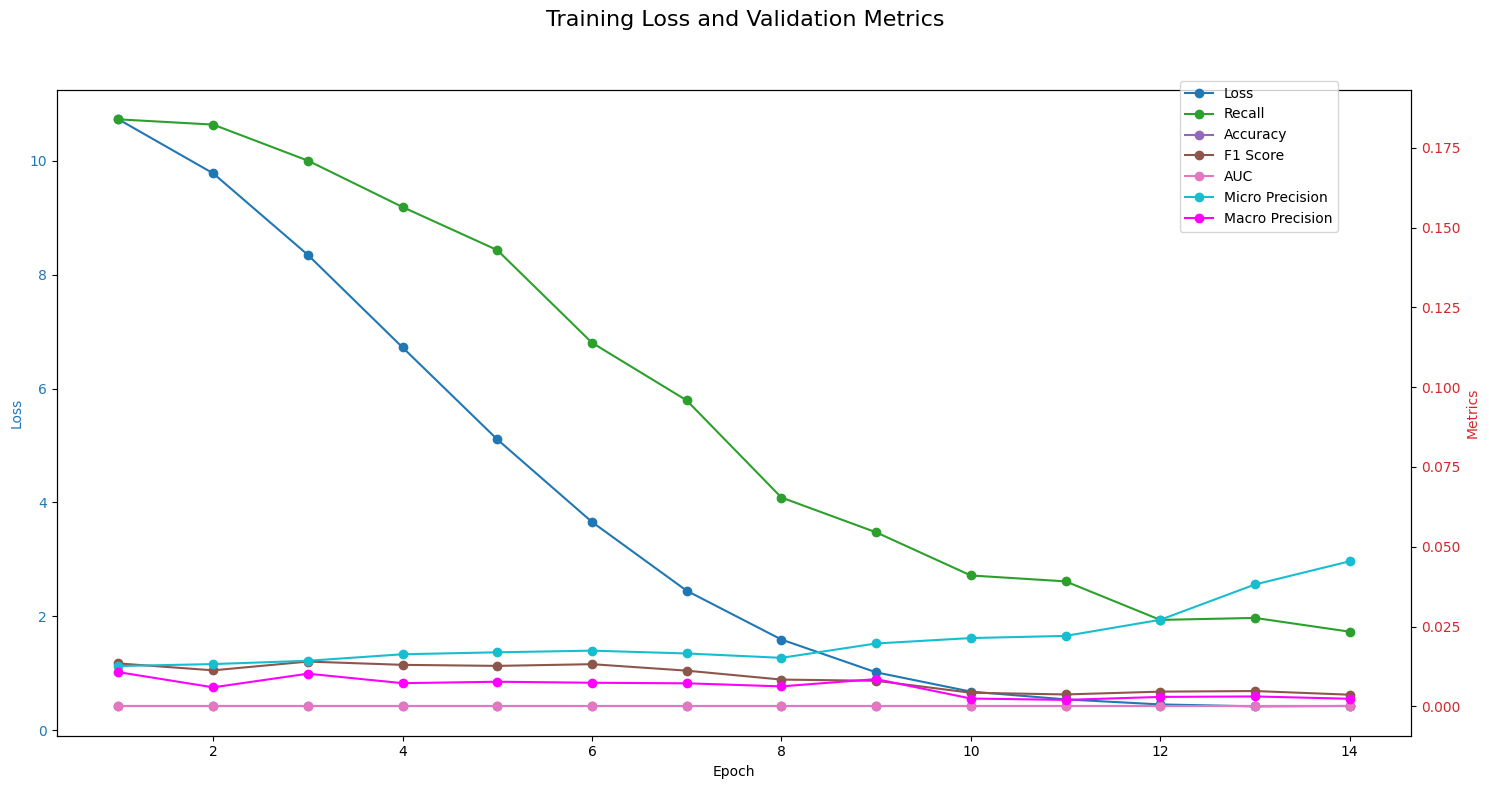

In [2]:
plot_combined_metrics_and_loss(losses, val_metrics)

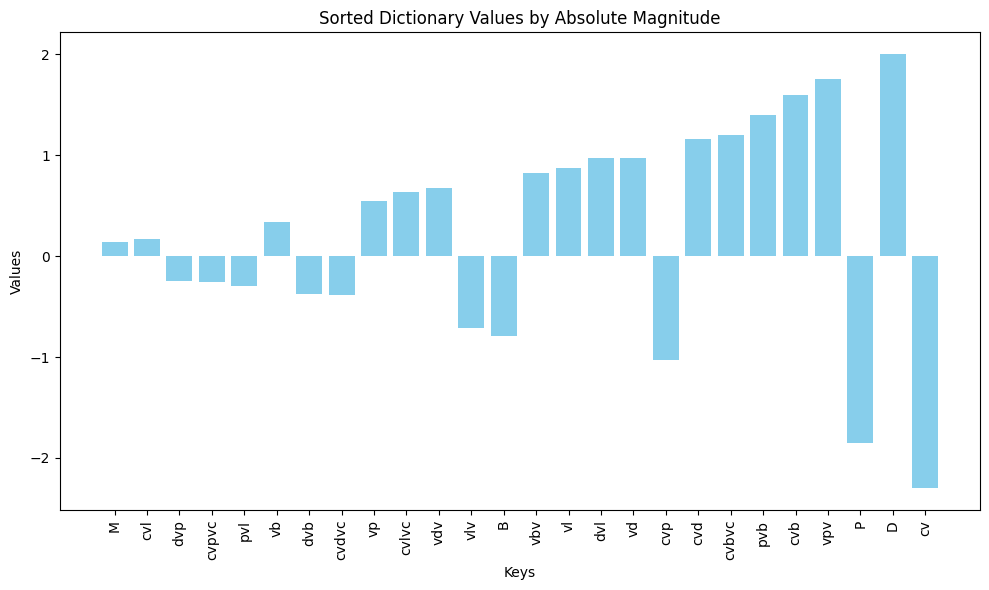

In [6]:
import matplotlib.pyplot as plt

sorted_data = dict(sorted(meta_path_weights.items(), key=lambda item: abs(item[1])))

# Extract keys and values for plotting
labels = list(sorted_data.keys())
values = list(sorted_data.values())

# Plotting the data as bars
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Sorted Dictionary Values by Absolute Magnitude')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()